In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.metrics as metrics


# Exercise 1


In [5]:
D = {((2,7),-1),((7.5,0.5),-1),((3,3.3),-1),((2.5,7.5),1),((4,3.8),1),((5,2),1)}

X = [x for x,y in D]
y = [y for x,y in D]
print(X)
print(y)


clf = SVC(kernel='linear').fit(X, y)


thetas = [round(t, 3) for t in np.append(clf.intercept_,clf.coef_)]
print(thetas)

[(7.5, 0.5), (3, 3.3), (2, 7), (4, 3.8), (5, 2), (2.5, 7.5)]
[-1, -1, -1, 1, 1, 1]
[-3.656, 0.32, 0.514]


# Exercise 2

In [20]:
D_train = {((8.7,16.5),1),((10.8,14.8),1),((12,16.7),1),((12.2,12.2),1),((16.5,13),-1),((5.8,23.5),-1)}
D_test = {((13,12.5),1),((6.2,21.3),-1),((6,25.8),1),((8.5,27.7),-1)}

X_train = np.array([x for x,y in D_train])
y_train = np.array([y for x,y in D_train])

print(X_train)
print(y_train)

X_test = np.array([x for x,y in D_test])
y_test = np.array([y for x,y in D_test])

print(X_test)
print(y_test)


[[10.8 14.8]
 [12.2 12.2]
 [ 5.8 23.5]
 [12.  16.7]
 [16.5 13. ]
 [ 8.7 16.5]]
[ 1  1 -1  1 -1  1]
[[ 8.5 27.7]
 [ 6.  25.8]
 [ 6.2 21.3]
 [13.  12.5]]
[-1  1 -1  1]


Plot dataset

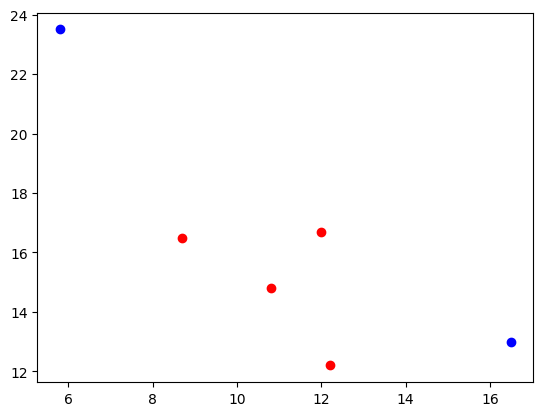

In [21]:
plt.figure()
plt.scatter([x[0] for x,y in D_train if y==1], [x[1] for x,y in D_train if y==1],color='red',marker='o')
plt.scatter([x[0] for x,y in D_train if y==-1], [x[1] for x,y in D_train if y==-1],color='blue',marker='o')
plt.show()

<Figure size 640x480 with 0 Axes>

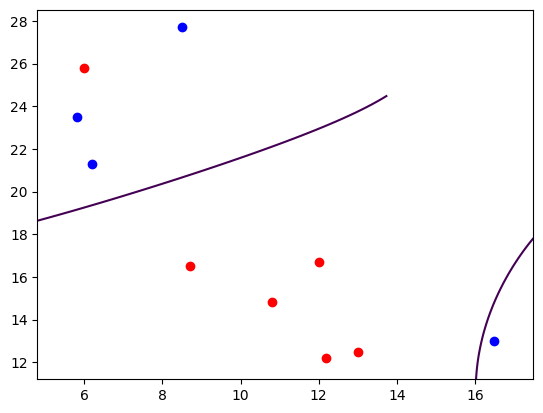

[[ 5.8 23.5]
 [16.5 13. ]
 [12.2 12.2]
 [12.  16.7]
 [ 8.7 16.5]]
Accuracy: 0.75
Precison: 1.0
Recall: 0.5
F1: 0.6666666666666666


In [45]:
clf = SVC(kernel='rbf').fit(X_train, y_train)

plt.figure()
DecisionBoundaryDisplay.from_estimator(clf, X_train,plot_method="contour",levels=[0])
plt.scatter([x[0] for x,y in D_train.union(D_test) if y==1], [x[1] for x,y in D_train.union(D_test) if y==1],color='red',marker='o')
plt.scatter([x[0] for x,y in D_train.union(D_test) if y==-1], [x[1] for x,y in D_train.union(D_test) if y==-1],color='blue',marker='o')
plt.show()

# print support vectors
print(clf.support_vectors_)

# print evaluation metrics
y_pred = clf.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precison: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
print(f"F1: {metrics.f1_score(y_test, y_pred)}")